## Pandas - Groupby & Aggregation

In [3]:
import pandas as pd

In [5]:
# Mount Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Heart_disease_details.csv to Heart_disease_details.csv


In [8]:
df = pd.read_csv('/content/Heart_disease_details.csv')
df.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior desc...,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,Shows a 75% blockage in the left anterior desc...,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,62,1,1,1,145,90,100,1,...,Shows a 80% blockage in the left circumflex co...,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,...,Shows a 90% blockage in the right coronary artery,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"


In [13]:
df.columns

Index(['Name', 'Gender', 'Age', 'Chest pain', 'Shortness of breath', 'Fatigue',
       'Systolic', 'Diastolic', 'Heart rate (bpm)', 'Lung sounds',
       'Cholesterol level (mg/dL)', 'LDL level (mg/dL)', 'HDL level (mg/dL)',
       'Diabetes', 'Atrial fibrillation', 'Mitral valve prolapse',
       'Rheumatic fever', 'Mitral stenosis', 'Aortic stenosis',
       'Tricuspid stenosis', 'Pulmonary stenosis', 'Dilated cardiomyopathy',
       'Hypertrophic cardiomyopathy', 'Restrictive cardiomyopathy',
       'Arrhythmogenic right ventricular cardiomyopathy',
       'Takotsubo cardiomyopathy', 'Drug use', 'Fever', 'Chills', 'Joint pain',
       'Alcoholism', 'Hypertension', 'Fainting', 'Dizziness', 'Smoking',
       'High cholesterol', 'Echocardiogram', 'Blood culture', 'EKG',
       'Cardiac CT', 'Obesity', 'Murmur', 'Chest x-ray', 'Previous illnesses',
       'Pulmonary function tests', 'Spirometry', 'Diagnosis', 'Medications',
       'Treatment'],
      dtype='object')

In [10]:
grouped_df = df.groupby(['Previous illnesses'])
grouped_df

In [12]:
# now we can perform basic operation on this grouped_df - Lets find the mean heart for each of the group
grouped_df["Heart rate (bpm)"].mean()

Previous illnesses
Aortic valve replacement surgery       117.500000
Mitral valve replacement surgery       107.500000
Recent chest surgery                   110.000000
Recent viral infection                 103.333333
Tricuspid valve replacement surgery    110.000000
Name: Heart rate (bpm), dtype: float64

In [15]:
# Lets check min & max age in both of the group
grouped_df['Age'].describe()[['min', 'max']]

,min,max
Previous illnesses,,
Aortic valve replacement surgery,50.0,70.0
Mitral valve replacement surgery,40.0,65.0
Recent chest surgery,50.0,60.0
Recent viral infection,35.0,55.0
Tricuspid valve replacement surgery,50.0,55.0


In [16]:
# We can also do the agg fun
grouped_df['Age'].agg(['min','max'])

,min,max
Previous illnesses,,
Aortic valve replacement surgery,50,70
Mitral valve replacement surgery,40,65
Recent chest surgery,50,60
Recent viral infection,35,55
Tricuspid valve replacement surgery,50,55


In [23]:
# Lets we can to check only the group that underwent recent chest surgery, we can get only this group from our groups
recent_chest_surgery_df = grouped_df.get_group('Recent chest surgery')
recent_chest_surgery_df

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
158,Emily Brown,Female,50,1,0,1,120,80,110,1,...,Shows thickening of the pericardium,0,0,NaN,Recent chest surgery,NaN,NaN,Acute pericarditis,"Ibuprofen, aspirin",Surgery if the patient has a recurrent and ref...
160,David Green,Male,60,1,0,1,130,80,110,1,...,Shows thickening of the pericardium,0,0,NaN,Recent chest surgery,NaN,NaN,Acute pericarditis,"Naproxen, colchicine",Surgery if the patient has a recurrent and ref...
161,John Smith,Male,60,1,0,1,130,80,110,1,...,Shows thickening of the pericardium,0,0,NaN,Recent chest surgery,NaN,NaN,Acute pericarditis,"Naproxen, colchicine",Surgery if the patient has a recurrent and ref...
163,Robert Johnson,Male,50,1,0,1,130,80,110,1,...,Shows thickening of the pericardium,0,0,NaN,Recent chest surgery,NaN,NaN,Acute pericarditis,"Naproxen, colchicine",Surgery if the patient has a recurrent and ref...




*   get_group('Recent chest surgery') retrieves the group corresponding to the category labeled as ‘Recent chest surgery’.
*  So we have only 4 patient whose who recently underwent chesk Surgery as we get only 4 rows, lets confirm we have the right group unique values






In [24]:
recent_chest_surgery_df['Previous illnesses'].unique()

array(['Recent chest surgery'], dtype=object)



*   Yes, its proved as unque returned is 'Recent chest surgery'





## Whats groups are useful for EDA

In [25]:
grouped_df ['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Previous illnesses,,,,,,,,
Aortic valve replacement surgery,4.0,60.00,8.164966,50.0,57.50,60.0,62.50,70.0
Mitral valve replacement surgery,4.0,51.25,11.086779,40.0,43.75,50.0,57.50,65.0
Recent chest surgery,4.0,55.00,5.773503,50.0,50.00,55.0,60.00,60.0
Recent viral infection,3.0,45.00,10.000000,35.0,40.00,45.0,50.00,55.0
Tricuspid valve replacement surgery,2.0,52.50,3.535534,50.0,51.25,52.5,53.75,55.0


In [26]:
grouped_df ['Age'].describe()[['min','max']].sort_values(by = 'min')

,min,max
Previous illnesses,,
Recent viral infection,35.0,55.0
Mitral valve replacement surgery,40.0,65.0
Aortic valve replacement surgery,50.0,70.0
Recent chest surgery,50.0,60.0
Tricuspid valve replacement surgery,50.0,55.0




*   We see that patient who previously underwent surgeries are 40 & above, so may be we can say that there is high chance that individuals between the ages of 40-70 may unergo atleast 1 surgery ?
*   List item



In [27]:
len(df['Age'].unique())

34

- We have total of 34 unique age values, its usually good practice to divide them into age buckets

- So, lets create an age group column with 4 values, upto 25 years of age, 26-50, 51-75 and 75+

In [34]:
import numpy as np
df['Age Group'] = np.NaN

## Creasing the mask
less_than_25 = df['Age'] <= 25
twenty_six_to_50 = (df['Age'] > 25) & (df['Age'] <=50)
fifty_one_to_75 = (df['Age'] > 50) & (df['Age'] <=75)
seventy_five_plus = df['Age'] > 75

## Apply the mask to create groupings
df.loc[less_than_25,"Age Group"] = "Upto 25"
df.loc[twenty_six_to_50,"Age Group"] = "26 - 50"
df.loc[fifty_one_to_75, "Age Group"] = "51 - 75"
df.loc[seventy_five_plus, "Age Group"] = "75 +"

## check Unique
df["Age Group"].unique()

array(['51 - 75', '26 - 50', '75 +', 'Upto 25'], dtype=object)

In [50]:
# Lets check how our groups with two values look like
# df["Age"].describe()[['count']].sort_values(by = ['Age Group', 'count', 'Previous illness'])

In [49]:
# # Group by 'Age Group' and 'Previous illness', calculate sum of counts, and sort
# result = df.groupby(['Age Group', 'Previous illnesses'])['count'].sum().reset_index()
# result = result.sort_values(by=['Age Group', 'count', 'Previous illnesses'])

# print(result)

In [38]:
df

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment,Age Group
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery",51 - 75
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery",51 - 75
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery",51 - 75
3,William Thompson,Male,62,1,1,1,145,90,100,1,...,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery",51 - 75
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,...,0,1,NaN,NaN,NaN,NaN,Coronary artery disease (CAD),"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery",51 - 75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,Emily Wilson,Female,55,1,1,1,130,80,120,1,...,0,1,NaN,NaN,NaN,NaN,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy,51 - 75
330,Jacob Smith,Male,48,1,1,1,130,80,120,1,...,0,1,NaN,NaN,NaN,NaN,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy,26 - 50
331,Jane Smith,Female,65,1,1,1,140,90,110,1,...,0,1,NaN,NaN,NaN,NaN,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy,51 - 75
332,David Johnson,Male,68,1,1,1,140,90,110,0,...,0,1,NaN,NaN,NaN,NaN,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy,51 - 75


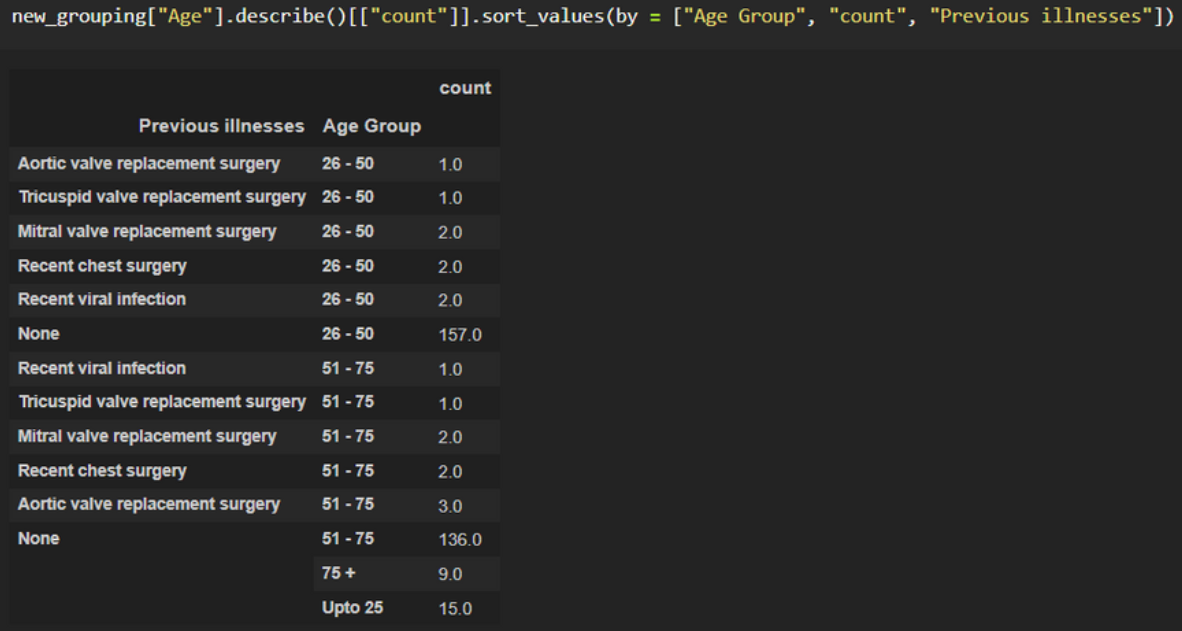